# HR Employee Attrition – Análisis y Modelo de Clasificación

## Introducción
La rotación de personal (*attrition*) impacta en costos de reclutamiento, pérdida de conocimiento y productividad. Este proyecto busca **entender los factores asociados a la renuncia** y **construir un modelo que estime la probabilidad de attrition** a nivel individuo.

**Dataset:** `data/HR-Employee-Attrition.csv` (IBM HR Analytics – datos sintéticos para uso educativo, ~1.470 filas y ~35 columnas con variables demográficas, de satisfacción, desempeño y antigüedad).

## Preguntas guía
- ¿Qué variables se asocian más con el attrition? (ej.: `OverTime`, `MonthlyIncome`, `YearsAtCompany`, `JobRole`)
- ¿Existen segmentos con mayor riesgo? (combinaciones de satisfacción, viaje, antigüedad)
- ¿Podemos predecir la renuncia con un desempeño útil para negocio?

## Objetivos
**Analíticos (EDA):**
- Explorar distribución de variables, valores faltantes y outliers.
- Detectar relaciones (bivariadas/multivariadas) relevantes con `Attrition`.

**Modelado (ML):**
- Entrenar un **árbol de decisión** como baseline y comparar con **Random Forest** y **Regresión Logística**.
- Abordar **desbalanceo de clases** (p.ej., `class_weight` o `SMOTE`).
- Evaluar con **ROC-AUC**, **Recall** y **F1** de la clase *Attrition = Yes*.

**Interpretabilidad:**
- Importancia de variables del modelo y, opcionalmente, **SHAP** para explicar predicciones.

## Alcance y supuestos
- Datos sintéticos, útiles para aprendizaje y demostración en portfolio.
- No se incluyen datos personales reales ni información sensible.

## Reproducibilidad
- Requisitos en `requirements.txt`.
- Dataset público incluido en `data/HR-Employee-Attrition.csv`.
- Semillas aleatorias fijadas cuando corresponda.

---

**Estructura del notebook (iterativa):**  
1) EDA → 2) Preprocesamiento → 3) Modelos → 4) Métricas → 5) Interpretabilidad → 6) Conclusiones.

# 1. Carga e inspección inicial de los datos
En esta sección se importa el dataset y se realiza una primera exploración general.  
El objetivo es verificar la estructura, tipos de datos, valores nulos o duplicados,  
y obtener una visión preliminar del contenido antes del análisis detallado.

In [140]:
# --- Importaciones principales ---
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder

In [125]:
# --- Configuración visual ---
plt.style.use('seaborn-v0_8')
sns.set_palette('Set2')
pd.set_option('display.max_columns', None)

In [126]:
# --- Carga de datos ---
df = pd.read_csv("data/HR_Employee_Attrition.csv")

In [127]:
# --- Vista general y estructura ---
df.head()
print("\nDimensiones:", df.shape)
df.info()


Dimensiones: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

In [128]:
# --- Vista general y estructura ---
df.head()

,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Yes,Travel_Rarely,1102,Sales,1,2,Life Sciences,1,1,2,Female,94,3,2,Sales Executive,4,Single,5993,19479,8,Y,Yes,11,3,1,80,0,8,0,1,6,4,0,5
1,49,No,Travel_Frequently,279,Research & Development,8,1,Life Sciences,1,2,3,Male,61,2,2,Research Scientist,2,Married,5130,24907,1,Y,No,23,4,4,80,1,10,3,3,10,7,1,7
2,37,Yes,Travel_Rarely,1373,Research & Development,2,2,Other,1,4,4,Male,92,2,1,Laboratory Technician,3,Single,2090,2396,6,Y,Yes,15,3,2,80,0,7,3,3,0,0,0,0
3,33,No,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,1,5,4,Female,56,3,1,Research Scientist,3,Married,2909,23159,1,Y,Yes,11,3,3,80,0,8,3,3,8,7,3,0
4,27,No,Travel_Rarely,591,Research & Development,2,1,Medical,1,7,1,Male,40,3,1,Laboratory Technician,2,Married,3468,16632,9,Y,No,12,3,4,80,1,6,3,3,2,2,2,2


In [129]:
print("\nDimensiones:", df.shape)
df.info()


Dimensiones: (1470, 35)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 35 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   Attrition                 1470 non-null   object
 2   BusinessTravel            1470 non-null   object
 3   DailyRate                 1470 non-null   int64 
 4   Department                1470 non-null   object
 5   DistanceFromHome          1470 non-null   int64 
 6   Education                 1470 non-null   int64 
 7   EducationField            1470 non-null   object
 8   EmployeeCount             1470 non-null   int64 
 9   EmployeeNumber            1470 non-null   int64 
 10  EnvironmentSatisfaction   1470 non-null   int64 
 11  Gender                    1470 non-null   object
 12  HourlyRate                1470 non-null   int64 
 13  JobInvolvement            1470 non-null   int64 
 14 

In [130]:
# --- Calidad de datos ---
nulos = df.isnull().sum().sort_values(ascending=False)
print("Valores nulos por columna:\n")
print(nulos.to_string())

duplicados = df.duplicated().sum()
print(f"\nFilas duplicadas: {duplicados}")

Valores nulos por columna:

Age                         0
StandardHours               0
NumCompaniesWorked          0
Over18                      0
OverTime                    0
PercentSalaryHike           0
PerformanceRating           0
RelationshipSatisfaction    0
StockOptionLevel            0
MonthlyIncome               0
TotalWorkingYears           0
TrainingTimesLastYear       0
WorkLifeBalance             0
YearsAtCompany              0
YearsInCurrentRole          0
YearsSinceLastPromotion     0
MonthlyRate                 0
MaritalStatus               0
Attrition                   0
EmployeeCount               0
BusinessTravel              0
DailyRate                   0
Department                  0
DistanceFromHome            0
Education                   0
EducationField              0
EmployeeNumber              0
JobSatisfaction             0
EnvironmentSatisfaction     0
Gender                      0
HourlyRate                  0
JobInvolvement              0
JobLevel    

In [131]:
# --- Estadísticas generales ---
df.describe()

,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.0,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,802.485714,9.192517,2.912925,1.0,1024.865306,2.721769,65.891156,2.729932,2.063946,2.728571,6502.931293,14313.103401,2.693197,15.209524,3.153741,2.712245,80.0,0.793878,11.279592,2.799320,2.761224,7.008163,4.229252,2.187755,4.123129
std,9.135373,403.509100,8.106864,1.024165,0.0,602.024335,1.093082,20.329428,0.711561,1.106940,1.102846,4707.956783,7117.786044,2.498009,3.659938,0.360824,1.081209,0.0,0.852077,7.780782,1.289271,0.706476,6.126525,3.623137,3.222430,3.568136
min,18.000000,102.000000,1.000000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,1.000000,1.000000,1009.000000,2094.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,30.000000,465.000000,2.000000,2.000000,1.0,491.250000,2.000000,48.000000,2.000000,1.000000,2.000000,2911.000000,8047.000000,1.000000,12.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,36.000000,802.000000,7.000000,3.000000,1.0,1020.500000,3.000000,66.000000,3.000000,2.000000,3.000000,4919.000000,14235.500000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,43.000000,1157.000000,14.000000,4.000000,1.0,1555.750000,4.000000,83.750000,3.000000,3.000000,4.000000,8379.000000,20461.500000,4.000000,18.000000,3.000000,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,9.000000,7.000000,3.000000,7.000000
max,60.000000,1499.000000,29.000000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,5.000000,4.000000,19999.000000,26999.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,17.000000


In [132]:
# --- Variable objetivo y cardinalidad ---
print("\nDistribución de 'Attrition':")
print(df['Attrition'].value_counts())

print("\nCantidad de valores únicos por columna:")
print(df.nunique().sort_values(ascending=False))


Distribución de 'Attrition':
Attrition
No     1233
Yes     237
Name: count, dtype: int64

Cantidad de valores únicos por columna:
EmployeeNumber              1470
MonthlyRate                 1427
MonthlyIncome               1349
DailyRate                    886
HourlyRate                    71
Age                           43
TotalWorkingYears             40
YearsAtCompany                37
DistanceFromHome              29
YearsInCurrentRole            19
YearsWithCurrManager          18
YearsSinceLastPromotion       16
PercentSalaryHike             15
NumCompaniesWorked            10
JobRole                        9
TrainingTimesLastYear          7
EducationField                 6
JobLevel                       5
Education                      5
StockOptionLevel               4
JobInvolvement                 4
JobSatisfaction                4
WorkLifeBalance                4
EnvironmentSatisfaction        4
RelationshipSatisfaction       4
BusinessTravel                 3
Department 

## Eliminación de variables sin valor explicativo

Antes del análisis exploratorio y posterior modelado, se eliminan las variables que no aportan información relevante para predecir la variable objetivo `Attrition`.  
A partir del análisis de la cantidad de valores únicos por columna, se observa que algunas variables son constantes o identificadoras, por lo que carecen de valor predictivo.

Las variables eliminadas son:

- **EmployeeNumber:** identificador único de cada empleado (sin relación con la rotación).  
- **EmployeeCount:** solo un valor único en toda la columna.  
- **StandardHours:** constante para todos los registros.  
- **Over18:** también constante, dado que todos los empleados son mayores de edad.  

Estas variables no tienen potencial explicativo y se eliminan del dataset antes del modelado.

In [133]:
cols_to_drop = ['EmployeeNumber', 'EmployeeCount', 'StandardHours', 'Over18']
df = df.drop(columns=cols_to_drop)

In [134]:
# Verificación rápida tras la eliminación
print("Dimensiones después de eliminar columnas:", df.shape)

Dimensiones después de eliminar columnas: (1470, 31)


# 2. Preparación y transformación de variables
En esta sección se realiza el preprocesamiento inicial del dataset.  
Se revisa la variable objetivo **Attrition** y se la convierte a formato numérico (1 = Yes, 0 = No),  
dejando el conjunto de datos listo para el análisis exploratorio y el modelado posterior.

## Transformación de variables dicotómicas

En esta etapa se convierten las variables categóricas binarias (con valores `Yes/No` o `Male/Female`) 
a formato numérico (`1/0`), requisito necesario para los algoritmos de *Machine Learning*.  
La variable objetivo **Attrition** (renuncia del empleado) y las variables **OverTime** y **Gender**
se transforman en valores binarios equivalentes.

In [135]:
# --- Verificación de la variable objetivo ---
df['Attrition'].unique()

array(['Yes', 'No'], dtype=object)

In [136]:
# --- Transformación de variables dicotómicas ---
# Se convierten las variables categóricas binarias (Yes/No) a formato numérico (1/0)
df['Attrition'] = df['Attrition'].apply(lambda x: 1 if x == 'Yes' else 0)
df['OverTime'] = df['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
df['Gender'] = df['Gender'].apply(lambda x: 1 if x == 'Male' else 0)

In [137]:
# Verificación del cambio
print("Attrition:")
print(df['Attrition'].value_counts(), "\n")
print("OverTime:")
print(df['OverTime'].value_counts(), "\n")
print("Gender:")
print(df['Gender'].value_counts())

Attrition:
Attrition
0    1233
1     237
Name: count, dtype: int64 

OverTime:
OverTime
0    1054
1     416
Name: count, dtype: int64 

Gender:
Gender
1    882
0    588
Name: count, dtype: int64


## Análisis del balance de clases

Antes del modelado, es importante observar la proporción de empleados que renunciaron (`Attrition = 1`)  
respecto de los que permanecen en la empresa (`Attrition = 0`). Esto permite anticipar posibles sesgos del modelo.

C:\Users\elias\AppData\Local\Temp\ipykernel_20820\2613174269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Attrition', data=df, palette='Set2')


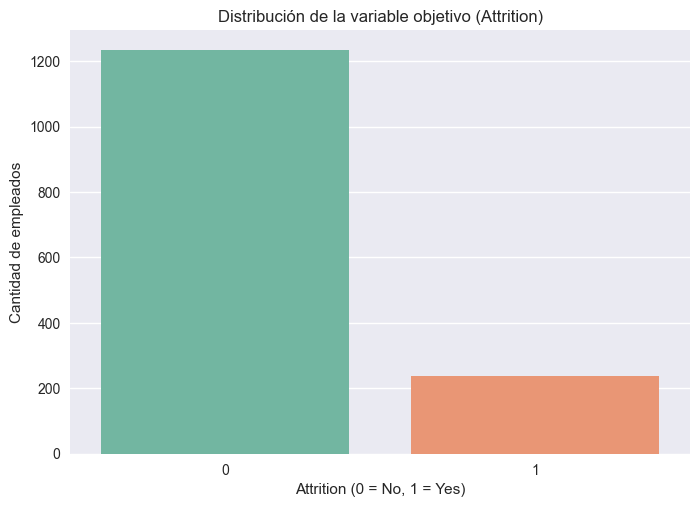

Procentaje de cada clase: Attrition
0    83.88
1    16.12
Name: proportion, dtype: float64


In [138]:
# --- Análisis del balance de clases ---
sns.countplot(x='Attrition', data=df, palette='Set2')
plt.title('Distribución de la variable objetivo (Attrition)')
plt.xlabel('Attrition (0 = No, 1 = Yes)')
plt.ylabel('Cantidad de empleados')
plt.show()

# Porcentaje de cada clase
attrition_rate = df['Attrition'].value_counts(normalize=True) * 100
print(f"Procentaje de cada clase: {attrition_rate.round(2)}")

## Identificación de variables numéricas y categóricas

Antes de avanzar con el análisis exploratorio, se identifican las variables numéricas y categóricas del dataset.  
Esto permitirá decidir qué tipo de visualizaciones y transformaciones aplicar en cada caso.

In [139]:
# --- Identificación de variables numéricas y categóricas ---

# Seleccionamos los nombres de las columnas según su tipo
num_cols = df.select_dtypes(include=['int64', 'float64']).columns
cat_cols = df.select_dtypes(include=['object']).columns

print("Variables numéricas:", len(num_cols))
print(num_cols.tolist())
print("\nVariables categóricas:", len(cat_cols))
print(cat_cols.tolist())

Variables numéricas: 26
['Age', 'Attrition', 'DailyRate', 'DistanceFromHome', 'Education', 'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement', 'JobLevel', 'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime', 'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

Variables categóricas: 5
['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']


## Codificación de variables categóricas (One-Hot Encoding)

Algunas variables categóricas contienen más de dos categorías (por ejemplo, 
`BusinessTravel`, `Department`, `JobRole`, `MaritalStatus` o `EducationField`).  
Para que puedan ser utilizadas por los algoritmos de *Machine Learning*, se transforman 
mediante **One-Hot Encoding**, que crea una nueva columna por cada categoría posible, 
con valores binarios (`0` o `1`).  

Este paso convierte todas las variables categóricas en formato numérico, 
manteniendo la información original sin introducir un orden artificial entre las categorías.

In [141]:
# Selección de variables categóricas a codificar
X_cat = df[['BusinessTravel', 'EducationField', 'Department', 'JobRole', 'MaritalStatus']]

In [142]:
# Inicialización y transformación
ohe = OneHotEncoder()
X_cat_encoded = ohe.fit_transform(X_cat).toarray()

In [143]:
# Conversión a DataFrame con nombres de columnas legibles
X_cat_encoded = pd.DataFrame(
    X_cat_encoded, 
    columns=ohe.get_feature_names_out(X_cat.columns)
)

In [144]:
# Visualización del resultado
X_cat_encoded.head()

,BusinessTravel_Non-Travel,BusinessTravel_Travel_Frequently,BusinessTravel_Travel_Rarely,EducationField_Human Resources,EducationField_Life Sciences,EducationField_Marketing,EducationField_Medical,EducationField_Other,EducationField_Technical Degree,Department_Human Resources,Department_Research & Development,Department_Sales,JobRole_Healthcare Representative,JobRole_Human Resources,JobRole_Laboratory Technician,JobRole_Manager,JobRole_Manufacturing Director,JobRole_Research Director,JobRole_Research Scientist,JobRole_Sales Executive,JobRole_Sales Representative,MaritalStatus_Divorced,MaritalStatus_Married,MaritalStatus_Single
0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


# 3. Análisis exploratorio de los datos (EDA)

En esta sección se analizan distribuciones, relaciones y patrones entre variables 
(numéricas y categóricas) con foco en su vínculo con **Attrition**.

## Correlación de las variables numéricas con Attrition

La correlación de las variables numéricas con la variable objetivo es baja en general,  
lo que sugiere que la rotación no depende de un solo factor cuantitativo,  
sino de la combinación de múltiples variables (numéricas y categóricas).

Attrition                   1.000000
DistanceFromHome            0.077924
NumCompaniesWorked          0.043494
MonthlyRate                 0.015170
PerformanceRating           0.002889
HourlyRate                 -0.006846
PercentSalaryHike          -0.013478
Education                  -0.031373
YearsSinceLastPromotion    -0.033019
RelationshipSatisfaction   -0.045872
DailyRate                  -0.056652
TrainingTimesLastYear      -0.059478
WorkLifeBalance            -0.063939
EnvironmentSatisfaction    -0.103369
JobSatisfaction            -0.103481
JobInvolvement             -0.130016
YearsAtCompany             -0.134392
StockOptionLevel           -0.137145
YearsWithCurrManager       -0.156199
Age                        -0.159205
MonthlyIncome              -0.159840
YearsInCurrentRole         -0.160545
JobLevel                   -0.169105
TotalWorkingYears          -0.171063
Name: Attrition, dtype: float64


C:\Users\elias\AppData\Local\Temp\ipykernel_20820\999904047.py:7: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')


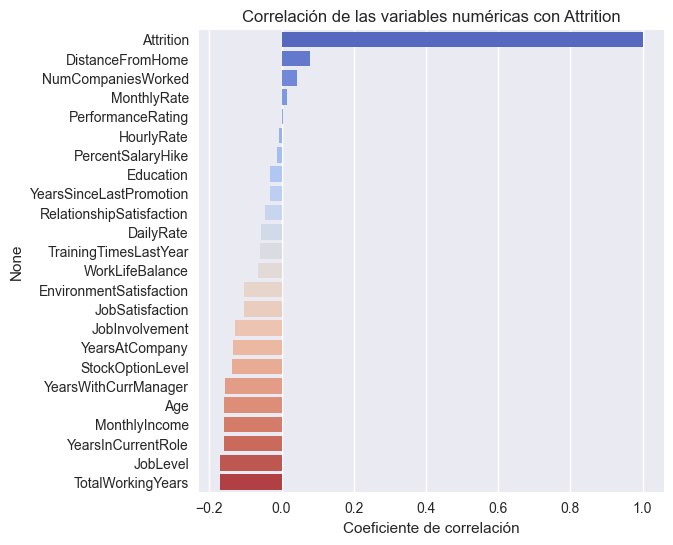

In [83]:
# --- Correlación de variables numéricas con Attrition ---
corr_target = df.corr(numeric_only=True)['Attrition'].sort_values(ascending=False)
print(corr_target)

# Visualización más clara
plt.figure(figsize=(6,6))
sns.barplot(x=corr_target.values, y=corr_target.index, palette='coolwarm')
plt.title('Correlación de las variables numéricas con Attrition')
plt.xlabel('Coeficiente de correlación')
plt.show()

Para mejorar la legibilidad, se seleccionaron las variables numéricas más relevantes en lugar de mostrar la matriz completa de correlaciones.  
Estas variables reflejan distintos aspectos del perfil laboral (edad, ingreso, antigüedad, promociones, distancia al trabajo) que podrían influir en la rotación del personal.

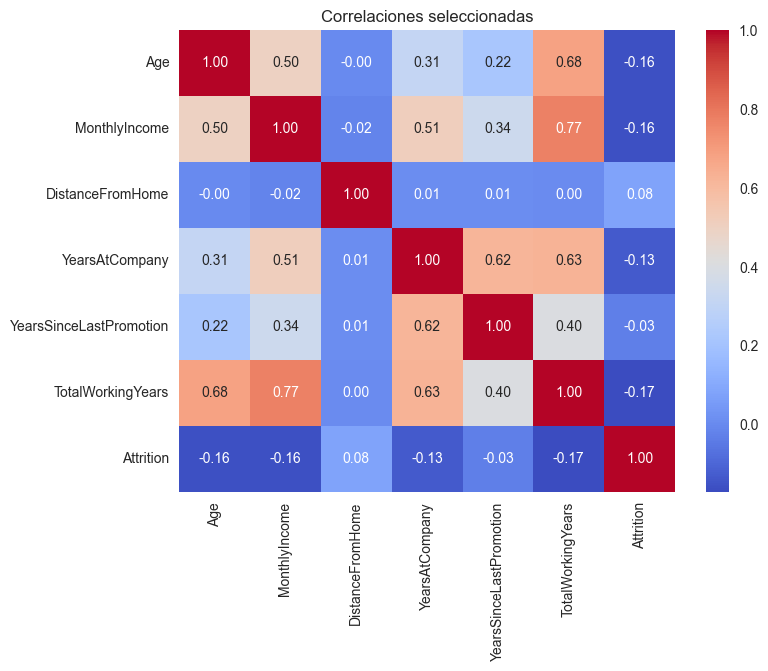

In [84]:
# --- Matriz de correlación de variables numéricas seleccionadas ---
num_focus = ['Age', 'MonthlyIncome', 'DistanceFromHome', 'YearsAtCompany',
             'YearsSinceLastPromotion', 'TotalWorkingYears', 'Attrition']

plt.figure(figsize=(8,6))
sns.heatmap(df[num_focus].corr(numeric_only=True), annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlaciones seleccionadas')
plt.show()

## Análisis de variables categóricas
En esta sección se exploran las principales variables categóricas en relación con la variable objetivo **Attrition**, 
para detectar patrones de comportamiento o posibles factores asociados a la rotación del personal.

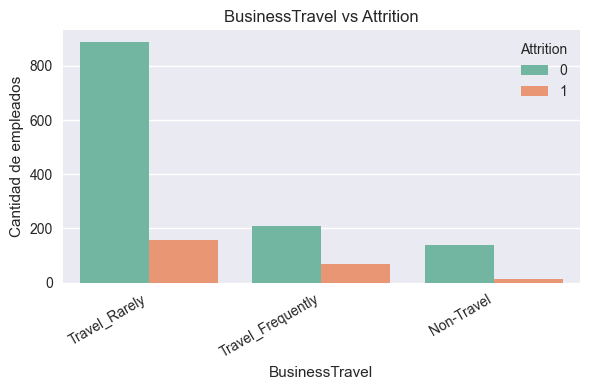

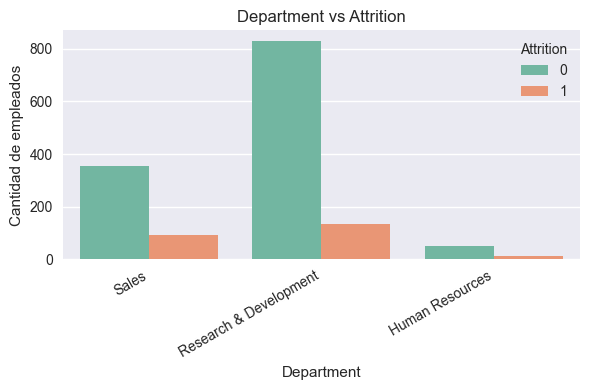

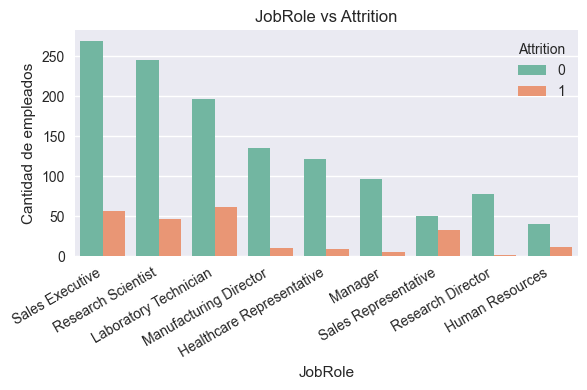

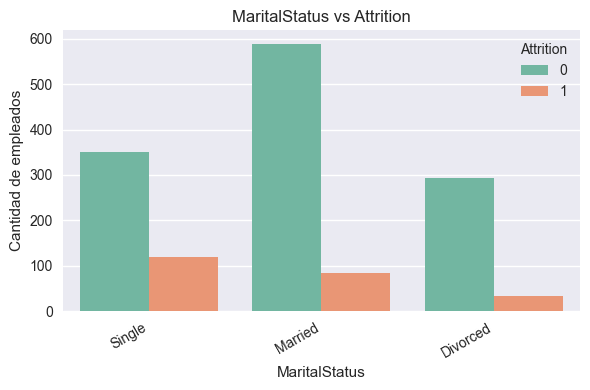

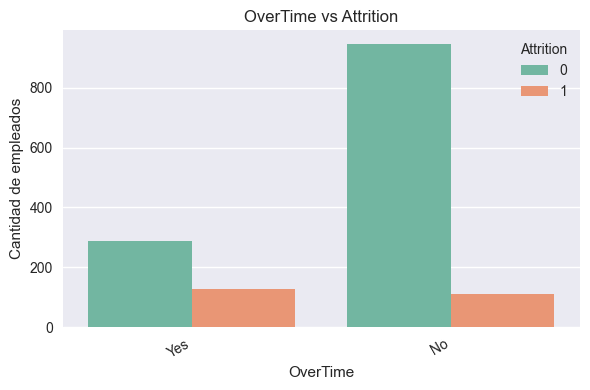

In [92]:
# --- Variables categóricas clave ---
cat_focus = ['BusinessTravel', 'Department', 'JobRole', 'MaritalStatus', 'OverTime']

for col in cat_focus:
    plt.figure(figsize=(6,4))
    sns.countplot(x=col, hue='Attrition', data=df, palette='Set2')
    plt.title(f'{col} vs Attrition')
    plt.xlabel(col)
    plt.ylabel('Cantidad de empleados')
    plt.xticks(rotation=30, ha='right')
    plt.tight_layout()
    plt.show()

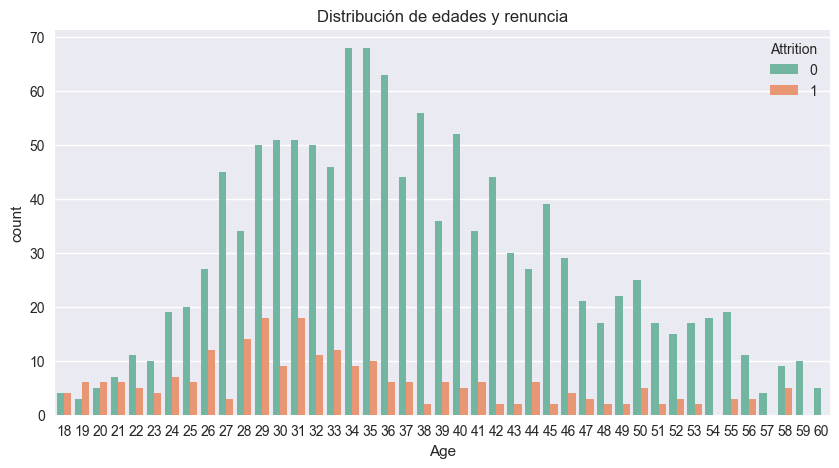

In [86]:
# Edad vs renuncia
plt.figure(figsize=(10,5))
sns.countplot(x='Age', hue='Attrition', data=df, palette='Set2')
plt.title('Distribución de edades y renuncia')
plt.show()

C:\Users\elias\AppData\Local\Temp\ipykernel_20820\1297444439.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition']==1]['DistanceFromHome'], label="Renuncian", color='r', shade=True)
C:\Users\elias\AppData\Local\Temp\ipykernel_20820\1297444439.py:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df[df['Attrition']==0]['DistanceFromHome'], label="Permanecen", color='b', shade=True)


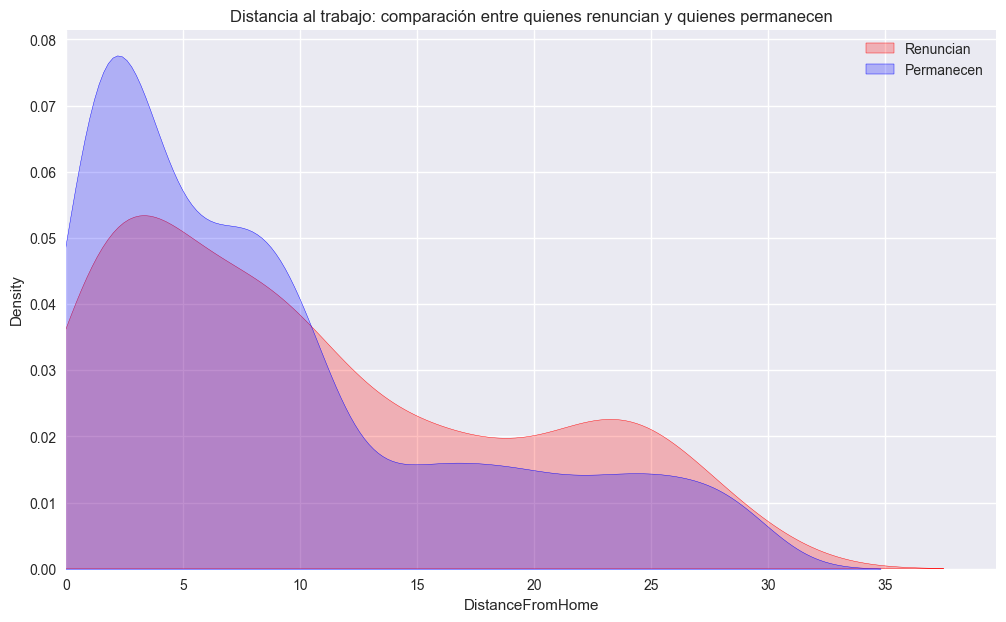

In [ ]:
plt.figure(figsize=(12,7))
sns.kdeplot(df[df['Attrition']==1]['DistanceFromHome'], label="Renuncian", color='r', shade=True)
sns.kdeplot(df[df['Attrition']==0]['DistanceFromHome'], label="Permanecen", color='b', shade=True)
plt.title('Distancia al trabajo: comparación entre quienes renuncian y quienes permanecen')
plt.xlabel('DistanceFromHome')
plt.legend()
plt.xlim(0)
plt.show()

### Interpretación general de las variables

Se observan patrones claros en la relación entre las variables y la variable objetivo (**Attrition**),  
que representa la **renuncia del empleado** a la empresa:

- Los empleados que realizan **horas extra (`OverTime = Yes`)** presentan una tasa de **renuncia** significativamente mayor.  
- En cuanto a los **roles y departamentos**, se observa una mayor proporción de **renuncias** en ciertos puestos específicos, especialmente entre *Sales Executive*, *Laboratory Technician* y *Research Scientist*.  
  Esto sugiere que las funciones más operativas o de base presentan un **mayor nivel de abandono** que los cargos gerenciales.  
- El **estado civil** también muestra diferencias: los empleados **solteros** tienden a **renunciar** más que los casados o divorciados.  
- En relación con los **viajes laborales (`BusinessTravel`)**, quienes viajan con mayor frecuencia exhiben una **ligera tendencia** a dejar la empresa.  
- En las variables numéricas, los empleados **más jóvenes** presentan mayores tasas de renuncia, lo que podría asociarse a una menor estabilidad laboral o búsqueda de nuevas oportunidades.  
- La **distancia desde el hogar (`DistanceFromHome`)** muestra una leve diferencia: quienes viven más lejos tienden a **renunciar algo más**, aunque el efecto no es determinante.

Estos resultados indican que la **renuncia** de los empleados no depende de un único factor cuantitativo,  
sino de la **combinación de condiciones laborales y personales**, que en conjunto pueden aumentar la probabilidad de abandono.

## Síntesis del análisis exploratorio

El análisis exploratorio permitió identificar patrones tanto en variables numéricas como categóricas.  
Las correlaciones mostraron relaciones débiles entre las variables cuantitativas y la renuncia, lo que sugiere que el abandono de la empresa 
no depende de un único factor medible, sino de la combinación de aspectos laborales y personales.  
En las variables categóricas, destacan las tasas más altas de renuncia entre empleados con horas extra frecuentes, 
determinados puestos operativos y personas solteras.  
Estos hallazgos orientan las siguientes etapas de modelado predictivo, 
donde se evaluará qué variables contribuyen con mayor peso a predecir la probabilidad de renuncia.

In [ ]:
df.OverTime = df.OverTime.apply(lambda x: 1 if x == 'Yes' else 0)

In [ ]:
df.BusinessTravel.unique()

array(['Travel_Rarely', 'Travel_Frequently', 'Non-Travel'], dtype=object)

In [ ]:
#Travel_Rarely = [1,0,0]
#Travel_Frequently = [0,1,0]
#Non-Travel = [0,0,1]


array([[<Axes: title={'center': 'Age'}>,
        <Axes: title={'center': 'DailyRate'}>,
        <Axes: title={'center': 'DistanceFromHome'}>,
        <Axes: title={'center': 'Education'}>,
        <Axes: title={'center': 'EmployeeCount'}>],
       [<Axes: title={'center': 'EmployeeNumber'}>,
        <Axes: title={'center': 'EnvironmentSatisfaction'}>,
        <Axes: title={'center': 'HourlyRate'}>,
        <Axes: title={'center': 'JobInvolvement'}>,
        <Axes: title={'center': 'JobLevel'}>],
       [<Axes: title={'center': 'JobSatisfaction'}>,
        <Axes: title={'center': 'MonthlyIncome'}>,
        <Axes: title={'center': 'MonthlyRate'}>,
        <Axes: title={'center': 'NumCompaniesWorked'}>,
        <Axes: title={'center': 'PercentSalaryHike'}>],
       [<Axes: title={'center': 'PerformanceRating'}>,
        <Axes: title={'center': 'RelationshipSatisfaction'}>,
        <Axes: title={'center': 'StandardHours'}>,
        <Axes: title={'center': 'StockOptionLevel'}>,
        <Axe

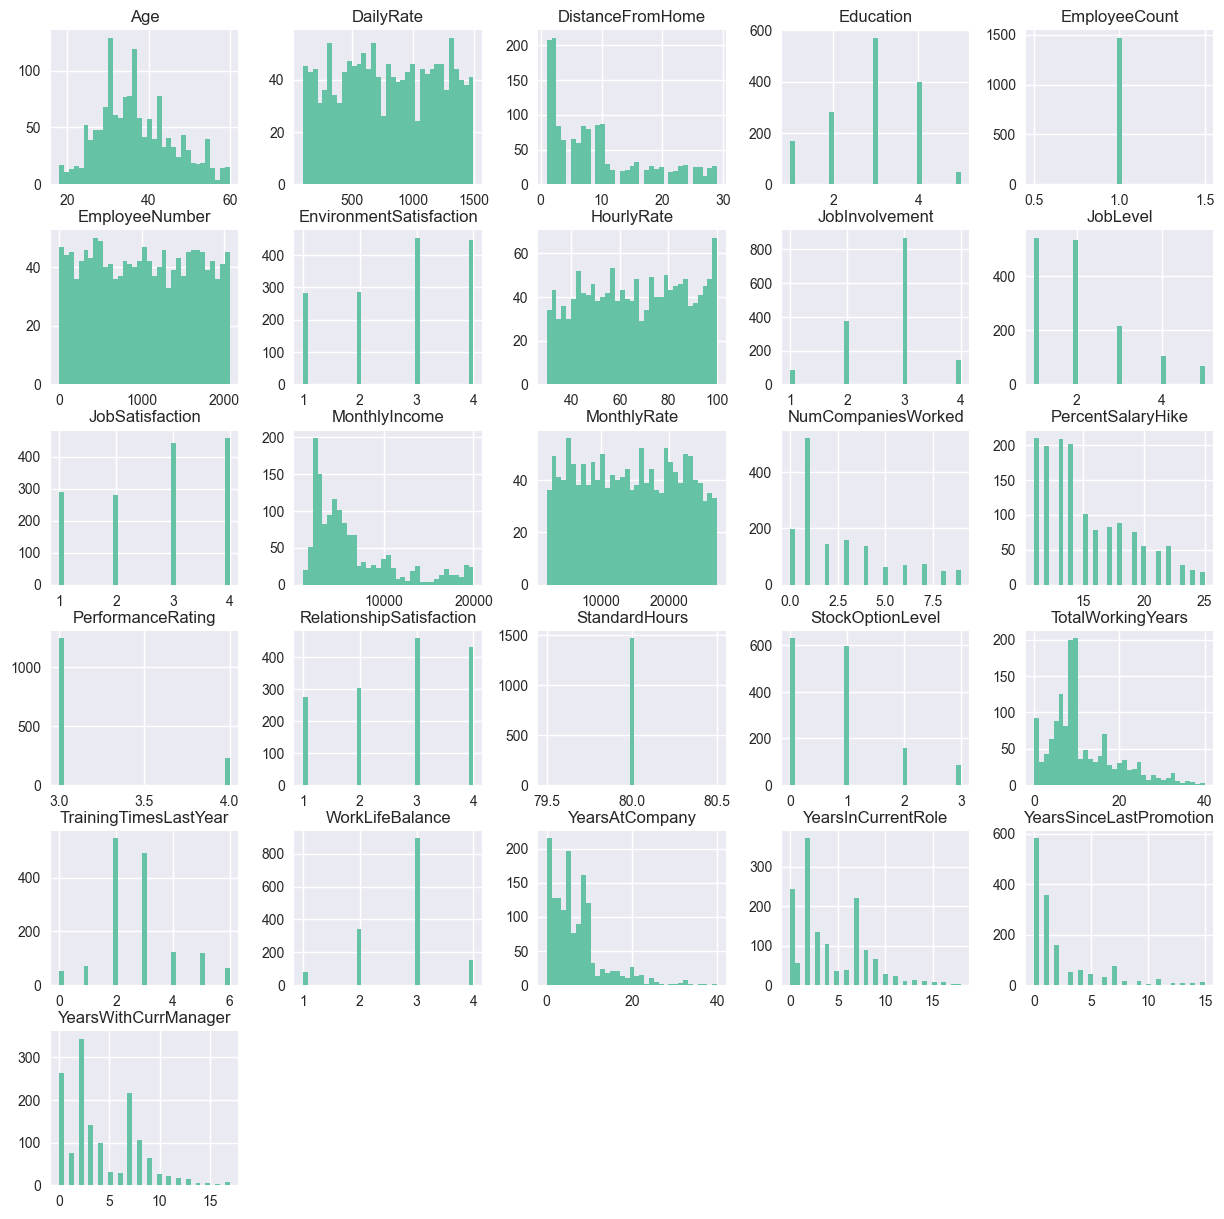

In [46]:
df.hist(bins = 35, figsize = (15,15))

In [ ]:
df.describe().T
# np --> .T se le coloca para que muestre la trabla Traspuesta

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,36.923810,9.135373,18.0,30.0,36.0,43.00,60.0
DailyRate,1470.0,802.485714,403.509100,102.0,465.0,802.0,1157.00,1499.0
DistanceFromHome,1470.0,9.192517,8.106864,1.0,2.0,7.0,14.00,29.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
EnvironmentSatisfaction,1470.0,2.721769,1.093082,1.0,2.0,3.0,4.00,4.0
HourlyRate,1470.0,65.891156,20.329428,30.0,48.0,66.0,83.75,100.0
JobInvolvement,1470.0,2.729932,0.711561,1.0,2.0,3.0,3.00,4.0
JobLevel,1470.0,2.063946,1.106940,1.0,1.0,2.0,3.00,5.0
JobSatisfaction,1470.0,2.728571,1.102846,1.0,2.0,3.0,4.00,4.0
MonthlyIncome,1470.0,6502.931293,4707.956783,1009.0,2911.0,4919.0,8379.00,19999.0


In [ ]:
df_quedan = df[y == 0]
# np --> se crea un dataframae con aquellos que se quedan.
# 0 es igual a "no" en el datadrame original, es decir, no abandonan.

In [ ]:
df_quedan

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
5,32,Travel_Frequently,1005,Research & Development,2,2,Life Sciences,4,Male,79,...,3,3,0,8,2,2,7,7,3,6
6,59,Travel_Rarely,1324,Research & Development,3,3,Medical,3,Female,81,...,4,1,3,12,3,2,1,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
df_abandonan = df[y == 1]
# np --> se crea un dataframe con aquellos que abandonan.
# 1 es igual a "yes" en el datadrame original, es decir, sí abandonan.

In [ ]:
df_abandonan

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
14,28,Travel_Rarely,103,Research & Development,24,3,Life Sciences,3,Male,50,...,3,2,0,6,4,3,4,2,0,3
21,36,Travel_Rarely,1218,Sales,9,4,Life Sciences,3,Male,82,...,4,2,0,10,4,3,5,3,0,3
24,34,Travel_Rarely,699,Research & Development,6,1,Medical,2,Male,83,...,3,3,0,8,2,3,4,2,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1438,23,Travel_Frequently,638,Sales,9,3,Marketing,4,Male,33,...,3,1,1,1,3,2,1,0,1,0
1442,29,Travel_Rarely,1092,Research & Development,1,4,Medical,1,Male,36,...,3,2,3,4,3,4,2,2,2,2
1444,56,Travel_Rarely,310,Research & Development,7,2,Technical Degree,4,Male,72,...,3,4,1,14,4,1,10,9,9,8
1452,50,Travel_Frequently,878,Sales,1,4,Life Sciences,2,Male,94,...,3,4,2,12,3,3,6,3,0,1


In [ ]:
len(df_quedan)

1233

In [ ]:
len(df_abandonan)

237

In [ ]:
len(df)

1470

In [ ]:
pcj_q = len(df_quedan)/len(df) * 100
pcj_a = len(df_abandonan)/len(df) * 100

# np --> con esto calculamos el porcentaje de los que se quedan y los que se van

In [ ]:
pcj_q

83.87755102040816

In [ ]:
pcj_a

16.122448979591837

In [ ]:
df_quedan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1233.0,37.561233,8.888360,18.0,31.0,36.0,43.0,60.0
DailyRate,1233.0,812.504461,403.208379,102.0,477.0,817.0,1176.0,1499.0
DistanceFromHome,1233.0,8.915653,8.012633,1.0,2.0,7.0,13.0,29.0
Education,1233.0,2.927007,1.027002,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,1233.0,2.771290,1.071132,1.0,2.0,3.0,4.0,4.0
HourlyRate,1233.0,65.952149,20.380754,30.0,48.0,66.0,83.0,100.0
JobInvolvement,1233.0,2.770479,0.692050,1.0,2.0,3.0,3.0,4.0
JobLevel,1233.0,2.145985,1.117933,1.0,1.0,2.0,3.0,5.0
JobSatisfaction,1233.0,2.778589,1.093277,1.0,2.0,3.0,4.0,4.0
MonthlyIncome,1233.0,6832.739659,4818.208001,1051.0,3211.0,5204.0,8834.0,19999.0


In [ ]:
df_abandonan.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,237.0,33.607595,9.689350,18.0,28.0,32.0,39.0,58.0
DailyRate,237.0,750.362869,401.899519,103.0,408.0,699.0,1092.0,1496.0
DistanceFromHome,237.0,10.632911,8.452525,1.0,3.0,9.0,17.0,29.0
Education,237.0,2.839662,1.008244,1.0,2.0,3.0,4.0,5.0
EnvironmentSatisfaction,237.0,2.464135,1.169791,1.0,1.0,3.0,4.0,4.0
HourlyRate,237.0,65.573840,20.099958,31.0,50.0,66.0,84.0,100.0
JobInvolvement,237.0,2.518987,0.773405,1.0,2.0,3.0,3.0,4.0
JobLevel,237.0,1.637131,0.940594,1.0,1.0,1.0,2.0,5.0
JobSatisfaction,237.0,2.468354,1.118058,1.0,1.0,3.0,3.0,4.0
MonthlyIncome,237.0,4787.092827,3640.210367,1009.0,2373.0,3202.0,5916.0,19859.0


In [ ]:
correlacion = df.corr(numeric_only=True)

<Axes: >

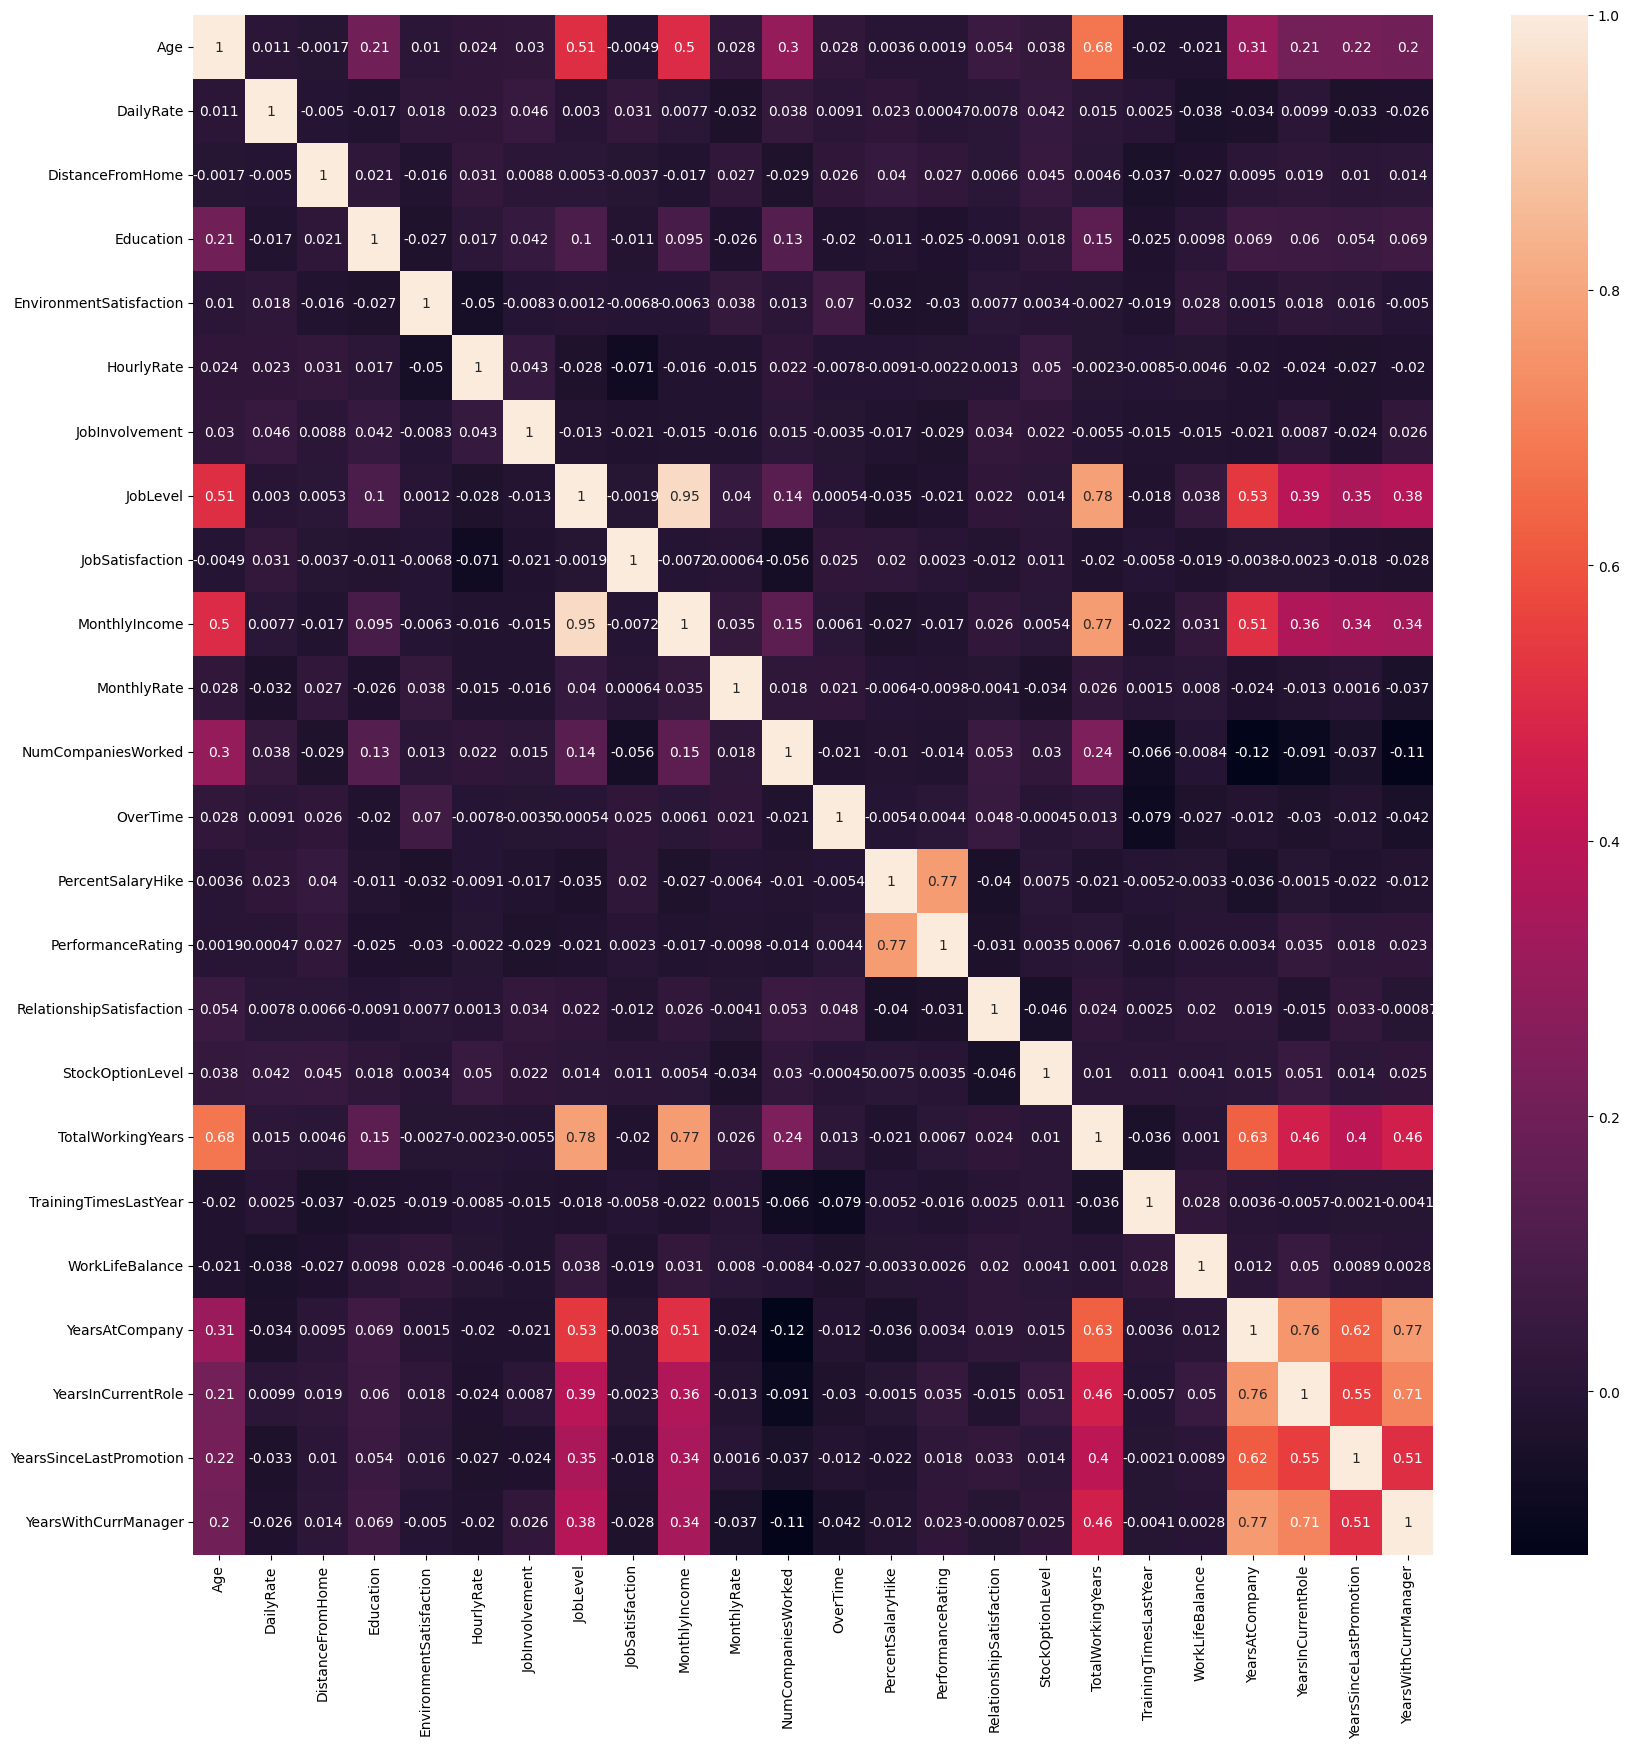

In [ ]:
f, ax = plt.subplots(figsize = (20,20))
sns.heatmap(correlacion, annot = True)

In [ ]:
df.corr(numeric_only=True)

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
Age,1.000000,0.010661,-0.001686,0.208034,0.010146,0.024287,0.029820,0.509604,-0.004892,0.497855,...,0.001904,0.053535,0.037510,0.680381,-0.019621,-0.021490,0.311309,0.212901,0.216513,0.202089
DailyRate,0.010661,1.000000,-0.004985,-0.016806,0.018355,0.023381,0.046135,0.002966,0.030571,0.007707,...,0.000473,0.007846,0.042143,0.014515,0.002453,-0.037848,-0.034055,0.009932,-0.033229,-0.026363
DistanceFromHome,-0.001686,-0.004985,1.000000,0.021042,-0.016075,0.031131,0.008783,0.005303,-0.003669,-0.017014,...,0.027110,0.006557,0.044872,0.004628,-0.036942,-0.026556,0.009508,0.018845,0.010029,0.014406
Education,0.208034,-0.016806,0.021042,1.000000,-0.027128,0.016775,0.042438,0.101589,-0.011296,0.094961,...,-0.024539,-0.009118,0.018422,0.148280,-0.025100,0.009819,0.069114,0.060236,0.054254,0.069065
EnvironmentSatisfaction,0.010146,0.018355,-0.016075,-0.027128,1.000000,-0.049857,-0.008278,0.001212,-0.006784,-0.006259,...,-0.029548,0.007665,0.003432,-0.002693,-0.019359,0.027627,0.001458,0.018007,0.016194,-0.004999
HourlyRate,0.024287,0.023381,0.031131,0.016775,-0.049857,1.000000,0.042861,-0.027853,-0.071335,-0.015794,...,-0.002172,0.001330,0.050263,-0.002334,-0.008548,-0.004607,-0.019582,-0.024106,-0.026716,-0.020123
JobInvolvement,0.029820,0.046135,0.008783,0.042438,-0.008278,0.042861,1.000000,-0.012630,-0.021476,-0.015271,...,-0.029071,0.034297,0.021523,-0.005533,-0.015338,-0.014617,-0.021355,0.008717,-0.024184,0.025976
JobLevel,0.509604,0.002966,0.005303,0.101589,0.001212,-0.027853,-0.012630,1.000000,-0.001944,0.950300,...,-0.021222,0.021642,0.013984,0.782208,-0.018191,0.037818,0.534739,0.389447,0.353885,0.375281
JobSatisfaction,-0.004892,0.030571,-0.003669,-0.011296,-0.006784,-0.071335,-0.021476,-0.001944,1.000000,-0.007157,...,0.002297,-0.012454,0.010690,-0.020185,-0.005779,-0.019459,-0.003803,-0.002305,-0.018214,-0.027656
MonthlyIncome,0.497855,0.007707,-0.017014,0.094961,-0.006259,-0.015794,-0.015271,0.950300,-0.007157,1.000000,...,-0.017120,0.025873,0.005408,0.772893,-0.021736,0.030683,0.514285,0.363818,0.344978,0.344079


<Axes: xlabel='Age', ylabel='count'>

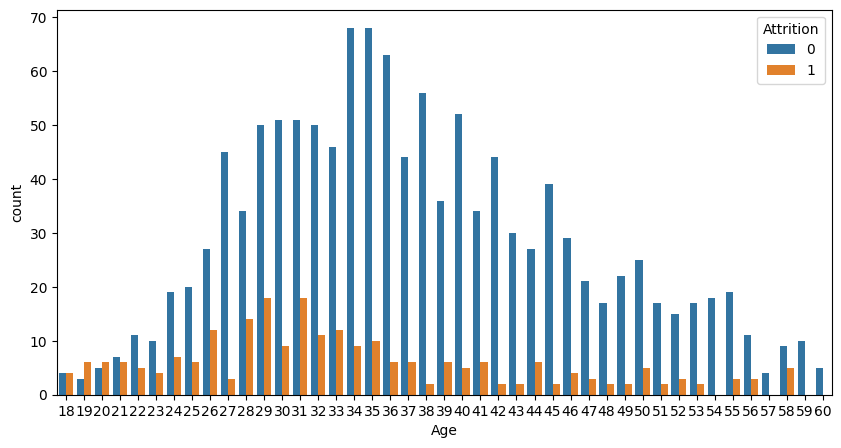

In [ ]:
plt.figure(figsize = [10,5])
sns.countplot(x = 'Age', hue = 'Attrition', data = pd.concat([df, y], axis = 1))

<Axes: xlabel='JobRole', ylabel='count'>

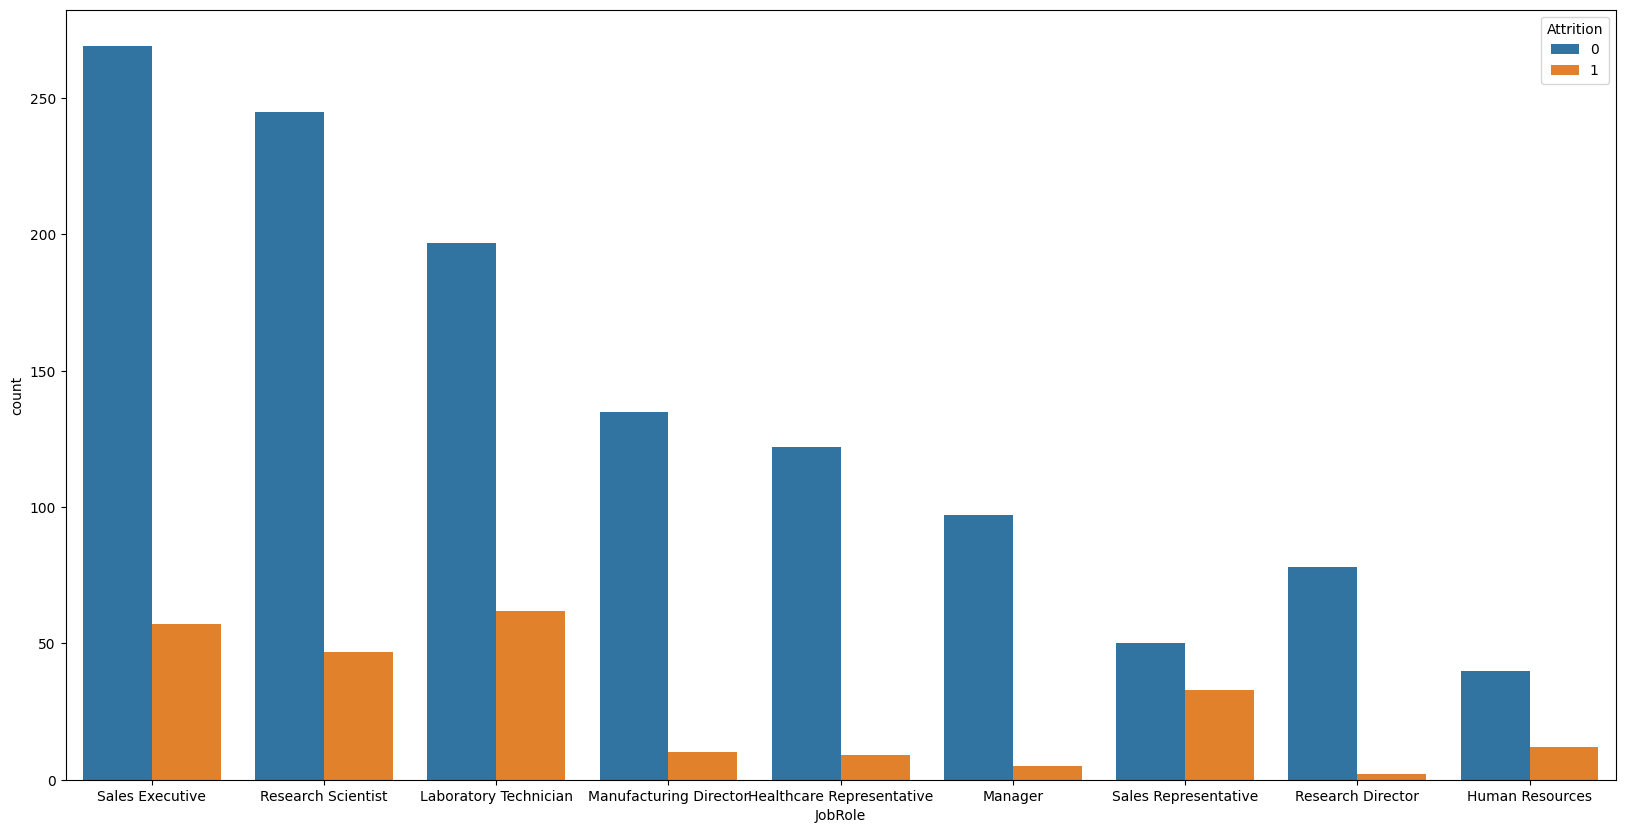

In [ ]:
plt.figure(figsize = [20,10])
sns.countplot(x = 'JobRole', hue = 'Attrition', data = pd.concat([df, y], axis = 1))

<Axes: xlabel='MaritalStatus', ylabel='count'>

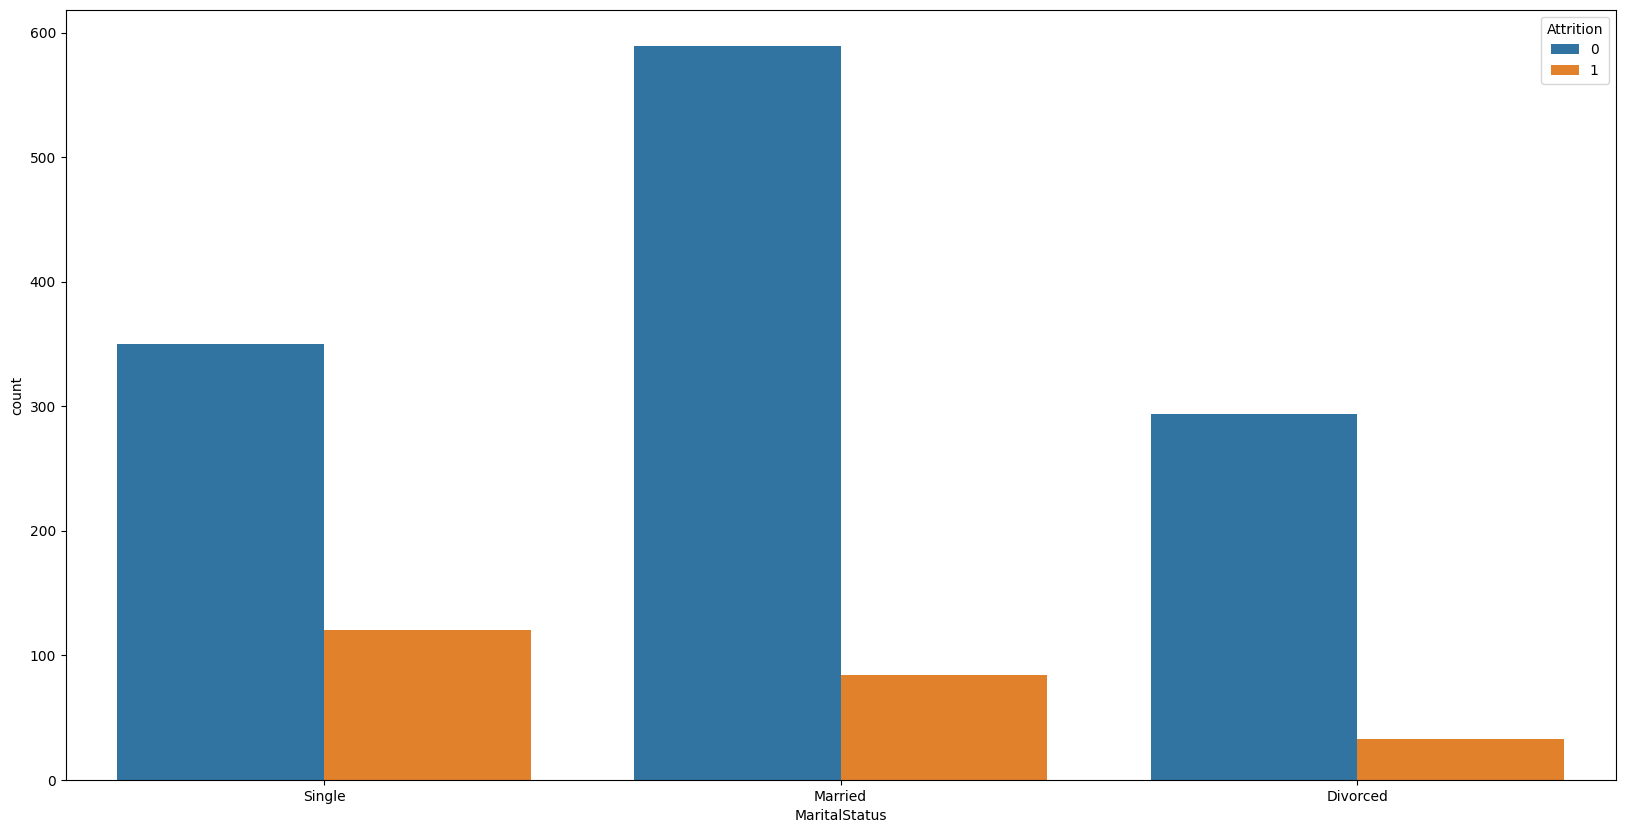

In [ ]:
plt.figure(figsize = [20,10])
sns.countplot(x = 'MaritalStatus', hue = 'Attrition', data = pd.concat([df, y], axis = 1))

<Axes: xlabel='Education', ylabel='count'>

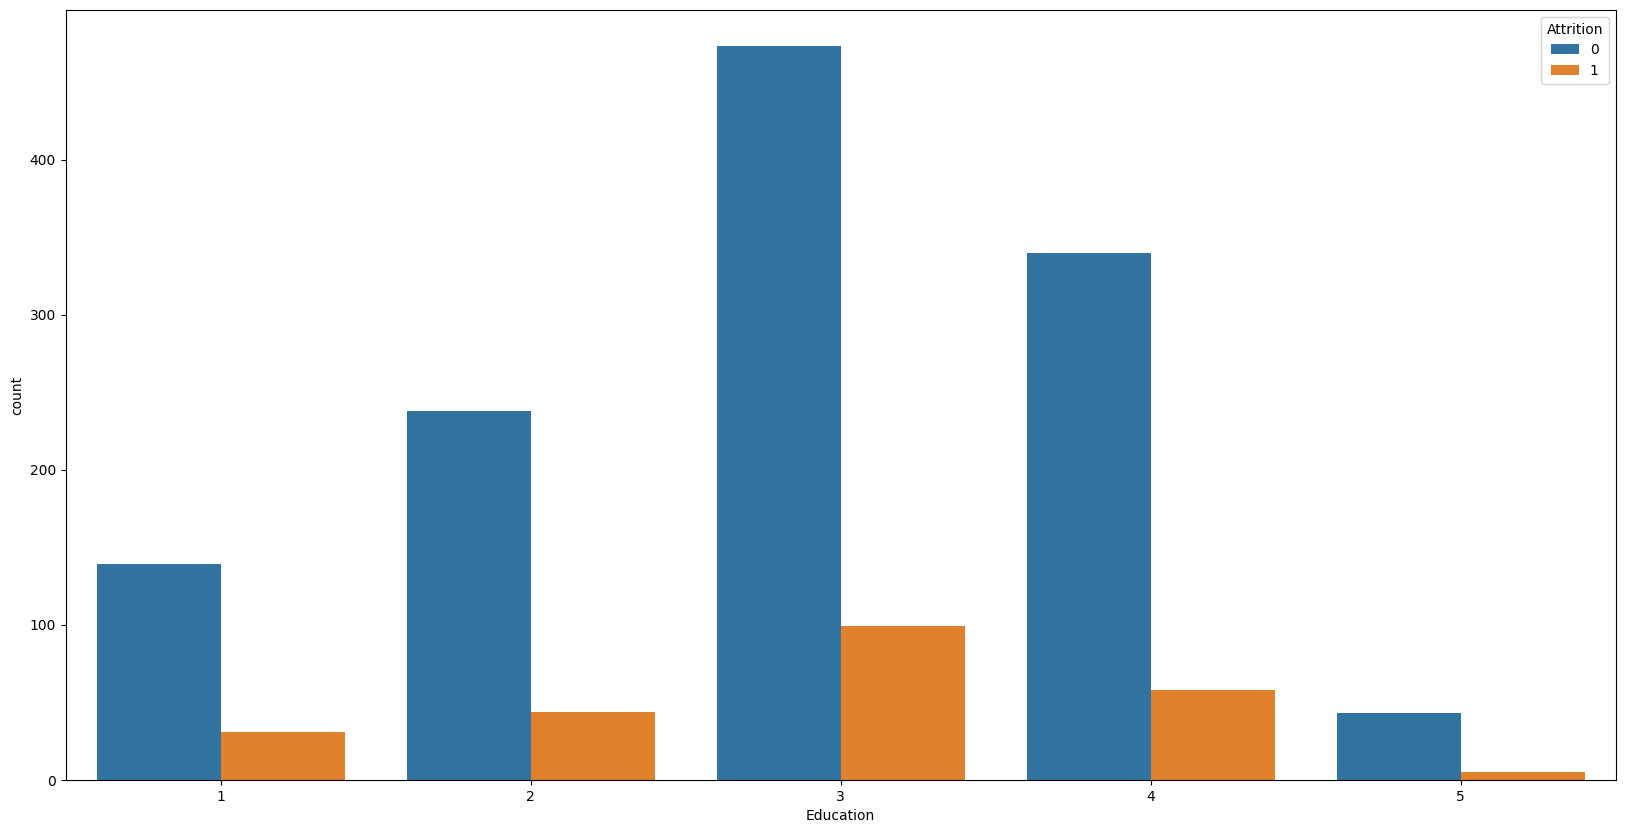

In [ ]:
plt.figure(figsize = [20,10])
sns.countplot(x = 'Education', hue = 'Attrition', data = pd.concat([df, y], axis = 1))

<ipython-input-152-f5c45c75cf2b>:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_abandonan['DistanceFromHome'], label = "Personas que abandonan", color = 'r', shade = True)
<ipython-input-152-f5c45c75cf2b>:3: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df_quedan['DistanceFromHome'], label = "Personas que se quedan", color = 'b', shade = True)


<Axes: xlabel='DistanceFromHome', ylabel='Density'>

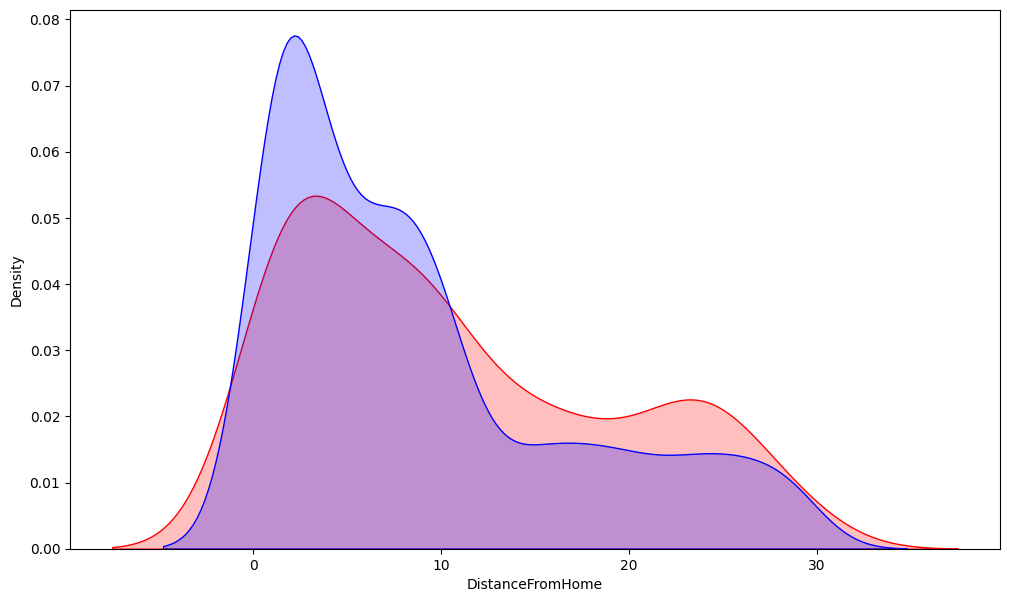

In [ ]:
plt.figure(figsize = [12,7])
sns.kdeplot(df_abandonan['DistanceFromHome'], label = "Personas que abandonan", color = 'r', shade = True)
sns.kdeplot(df_quedan['DistanceFromHome'], label = "Personas que se quedan", color = 'b', shade = True)

<Axes: xlabel='MonthlyIncome', ylabel='Gender'>

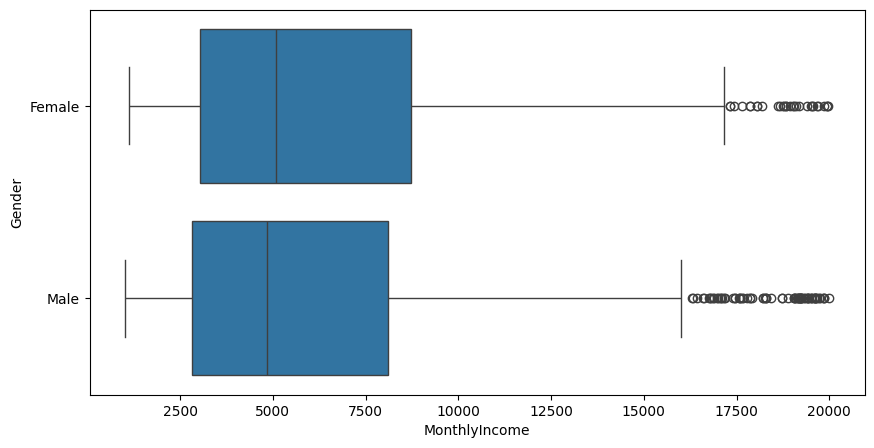

In [ ]:
plt.figure(figsize = [10,5])
sns.boxplot(x = 'MonthlyIncome', y = 'Gender', data = df)

In [ ]:
df.JobRole.unique()

array(['Sales Executive', 'Research Scientist', 'Laboratory Technician',
       'Manufacturing Director', 'Healthcare Representative', 'Manager',
       'Sales Representative', 'Research Director', 'Human Resources'],
      dtype=object)

<Axes: xlabel='MonthlyIncome', ylabel='JobRole'>

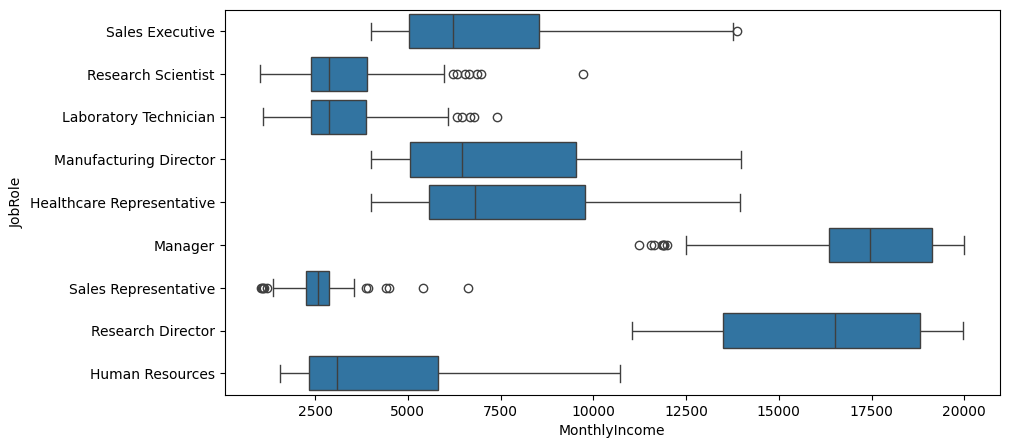

In [ ]:
plt.figure(figsize = [10,5])
sns.boxplot(x = 'MonthlyIncome', y = 'JobRole', data = df)

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [ ]:
X_cat = df[['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']]

In [ ]:
X_cat

,BusinessTravel,Department,EducationField,Gender,JobRole,MaritalStatus
0,Travel_Rarely,Sales,Life Sciences,Female,Sales Executive,Single
1,Travel_Frequently,Research & Development,Life Sciences,Male,Research Scientist,Married
2,Travel_Rarely,Research & Development,Other,Male,Laboratory Technician,Single
3,Travel_Frequently,Research & Development,Life Sciences,Female,Research Scientist,Married
4,Travel_Rarely,Research & Development,Medical,Male,Laboratory Technician,Married
...,...,...,...,...,...,...
1465,Travel_Frequently,Research & Development,Medical,Male,Laboratory Technician,Married
1466,Travel_Rarely,Research & Development,Medical,Male,Healthcare Representative,Married
1467,Travel_Rarely,Research & Development,Life Sciences,Male,Manufacturing Director,Married
1468,Travel_Frequently,Sales,Medical,Male,Sales Executive,Married


In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ohe = OneHotEncoder()
X_cat = ohe.fit_transform(X_cat).toarray()

In [ ]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_cat = pd.DataFrame(X_cat)

In [ ]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_num = df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis = 1)

In [ ]:
X_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
df

,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,Gender,HourlyRate,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,Travel_Rarely,1102,Sales,1,2,Life Sciences,2,Female,94,...,3,1,0,8,0,1,6,4,0,5
1,49,Travel_Frequently,279,Research & Development,8,1,Life Sciences,3,Male,61,...,4,4,1,10,3,3,10,7,1,7
2,37,Travel_Rarely,1373,Research & Development,2,2,Other,4,Male,92,...,3,2,0,7,3,3,0,0,0,0
3,33,Travel_Frequently,1392,Research & Development,3,4,Life Sciences,4,Female,56,...,3,3,0,8,3,3,8,7,3,0
4,27,Travel_Rarely,591,Research & Development,2,1,Medical,1,Male,40,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,Travel_Frequently,884,Research & Development,23,2,Medical,3,Male,41,...,3,3,1,17,3,3,5,2,0,3
1466,39,Travel_Rarely,613,Research & Development,6,1,Medical,4,Male,42,...,3,1,1,9,5,3,7,7,1,7
1467,27,Travel_Rarely,155,Research & Development,4,3,Life Sciences,2,Male,87,...,4,2,1,6,0,3,6,2,0,3
1468,49,Travel_Frequently,1023,Sales,2,3,Medical,4,Male,63,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 30 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   Age                       1470 non-null   int64 
 1   BusinessTravel            1470 non-null   object
 2   DailyRate                 1470 non-null   int64 
 3   Department                1470 non-null   object
 4   DistanceFromHome          1470 non-null   int64 
 5   Education                 1470 non-null   int64 
 6   EducationField            1470 non-null   object
 7   EnvironmentSatisfaction   1470 non-null   int64 
 8   Gender                    1470 non-null   object
 9   HourlyRate                1470 non-null   int64 
 10  JobInvolvement            1470 non-null   int64 
 11  JobLevel                  1470 non-null   int64 
 12  JobRole                   1470 non-null   object
 13  JobSatisfaction           1470 non-null   int64 
 14  MaritalStatus           

In [ ]:
tmp = df.drop(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus'], axis = 1)

In [ ]:
tmp

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,41,1102,1,2,2,94,3,2,4,5993,...,3,1,0,8,0,1,6,4,0,5
1,49,279,8,1,3,61,2,2,2,5130,...,4,4,1,10,3,3,10,7,1,7
2,37,1373,2,2,4,92,2,1,3,2090,...,3,2,0,7,3,3,0,0,0,0
3,33,1392,3,4,4,56,3,1,3,2909,...,3,3,0,8,3,3,8,7,3,0
4,27,591,2,1,1,40,3,1,2,3468,...,3,4,1,6,3,3,2,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,36,884,23,2,3,41,4,2,4,2571,...,3,3,1,17,3,3,5,2,0,3
1466,39,613,6,1,4,42,2,3,1,9991,...,3,1,1,9,5,3,7,7,1,7
1467,27,155,4,3,2,87,4,2,2,6142,...,4,2,1,6,0,3,6,2,0,3
1468,49,1023,2,3,4,63,2,2,2,5390,...,3,4,0,17,3,2,9,6,0,8


In [ ]:
tmp.columns

Index(['Age', 'DailyRate', 'DistanceFromHome', 'Education',
       'EnvironmentSatisfaction', 'HourlyRate', 'JobInvolvement', 'JobLevel',
       'JobSatisfaction', 'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StockOptionLevel', 'TotalWorkingYears',
       'TrainingTimesLastYear', 'WorkLifeBalance', 'YearsAtCompany',
       'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [ ]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_num = scaler.fit_transform(X_num)

In [ ]:
X_num

array([[0.54761905, 0.71581961, 0.        , ..., 0.22222222, 0.        ,
        0.29411765],
       [0.73809524, 0.12670007, 0.25      , ..., 0.38888889, 0.06666667,
        0.41176471],
       [0.45238095, 0.90980673, 0.03571429, ..., 0.        , 0.        ,
        0.        ],
       ...,
       [0.21428571, 0.03793844, 0.10714286, ..., 0.11111111, 0.        ,
        0.17647059],
       [0.73809524, 0.65926986, 0.03571429, ..., 0.33333333, 0.        ,
        0.47058824],
       [0.38095238, 0.37652112, 0.25      , ..., 0.16666667, 0.06666667,
        0.11764706]])

In [ ]:
X_num = pd.DataFrame(X_num, columns = tmp.columns)

In [ ]:
X_num

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [ ]:
X_num.reset_index()
X_cat.reset_index()

,index,0,1,2,3,4,5,6,7,8,...,16,17,18,19,20,21,22,23,24,25
0,0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_cat

,0,1,2,3,4,5,6,7,8,9,...,16,17,18,19,20,21,22,23,24,25
0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
X_cat.reset_index()
X_num.reset_index()

,index,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,...,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,...,0.0,0.000000,0.000000,0.200,0.000000,0.000000,0.150,0.222222,0.000000,0.294118
1,1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,...,1.0,1.000000,0.333333,0.250,0.500000,0.666667,0.250,0.388889,0.066667,0.411765
2,2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,...,0.0,0.333333,0.000000,0.175,0.500000,0.666667,0.000,0.000000,0.000000,0.000000
3,3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,...,0.0,0.666667,0.000000,0.200,0.500000,0.666667,0.200,0.388889,0.200000,0.000000
4,4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,...,0.0,1.000000,0.333333,0.150,0.500000,0.666667,0.050,0.111111,0.133333,0.117647
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,...,0.0,0.666667,0.333333,0.425,0.500000,0.666667,0.125,0.111111,0.000000,0.176471
1466,1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,...,0.0,0.000000,0.333333,0.225,0.833333,0.666667,0.175,0.388889,0.066667,0.411765
1467,1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,...,1.0,0.333333,0.333333,0.150,0.000000,0.666667,0.150,0.111111,0.000000,0.176471
1468,1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,...,0.0,1.000000,0.000000,0.425,0.500000,0.333333,0.225,0.333333,0.000000,0.470588


In [ ]:
X_all = pd.concat([X_num, X_cat], axis = 1)

In [ ]:
X_all

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
0,0.547619,0.715820,0.000000,0.25,0.333333,0.914286,0.666667,0.25,1.000000,0.262454,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
1,0.738095,0.126700,0.250000,0.00,0.666667,0.442857,0.333333,0.25,0.333333,0.217009,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
2,0.452381,0.909807,0.035714,0.25,1.000000,0.885714,0.333333,0.00,0.666667,0.056925,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
3,0.357143,0.923407,0.071429,0.75,1.000000,0.371429,0.666667,0.00,0.666667,0.100053,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
4,0.214286,0.350036,0.035714,0.00,0.000000,0.142857,0.666667,0.00,0.333333,0.129489,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,0.428571,0.559771,0.785714,0.25,0.666667,0.157143,1.000000,0.25,1.000000,0.082254,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1466,0.500000,0.365784,0.178571,0.00,1.000000,0.171429,0.333333,0.50,0.000000,0.472986,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1467,0.214286,0.037938,0.107143,0.50,0.333333,0.814286,1.000000,0.25,0.333333,0.270300,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1468,0.738095,0.659270,0.035714,0.50,1.000000,0.471429,0.333333,0.25,0.333333,0.230700,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0


In [ ]:
y

0       1
1       0
2       1
3       0
4       0
       ..
1465    0
1466    0
1467    0
1468    0
1469    0
Name: Attrition, Length: 1470, dtype: int64

# Clase 6

Separamos el dataset en:
-Conjunto de entrenamiento y conjunto de prueba para **variable dependiente**.
-Conjunto de entrenamiento y conjunto prueba para **variable independiente**.

Split

Si no cambiamos las .columns a "str" el modelo nos tira error cuando lo entrenamos. Es por eso que vamos a cambiar a .astrype(str)

In [ ]:
X_all.columns = X_all.columns.astype(str) #nota: ver min 58-59 de la clase: pone este código porque cuando los nombres de las columnas
#son números, no corre el código, dado que piden que los nombres estén en string.

In [ ]:
from sklearn.model_selection import train_test_split

In [ ]:
#nota: test_size refiere al porcentaje de datos utilizados para testear, en este caso, 30% (0.3). Por ende, se entrenará con el 70% (0.7)
#nota: random_state es la pseudoaleatoriedad. Se usa 42 por convención. Busacar en google random_state y ver que efectivamente es así.

X_train, X_test, y_train, y_test = train_test_split(X_all, y, test_size = 0.3, random_state = 42) #nombre de X, nombre de y, test_size, pseudo aleatoriedad

In [ ]:
X_train

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
714,0.761905,0.732999,0.000000,0.25,1.000000,0.514286,0.666667,0.75,1.000000,0.863086,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0
135,0.428571,0.081603,0.178571,0.25,0.333333,0.771429,0.666667,0.25,0.333333,0.207056,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1271,0.071429,0.168218,0.214286,0.00,0.333333,0.014286,0.666667,0.00,0.333333,0.087941,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
477,0.761905,0.818898,0.071429,0.50,0.000000,0.985714,0.666667,1.00,0.333333,0.905266,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
806,0.809524,0.638511,0.214286,0.75,0.333333,0.814286,0.666667,0.50,0.333333,0.496893,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,0.404762,0.463851,0.964286,0.50,0.333333,0.228571,1.000000,0.25,0.666667,0.126277,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1294,0.547619,0.246958,0.142857,0.50,0.333333,0.785714,1.000000,0.25,0.333333,0.308636,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
860,0.095238,0.826056,0.071429,0.75,0.666667,0.257143,0.333333,0.00,1.000000,0.097104,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
1459,0.261905,0.913386,0.428571,0.25,1.000000,0.228571,0.333333,0.25,0.333333,0.158820,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
X_test

,Age,DailyRate,DistanceFromHome,Education,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,...,16,17,18,19,20,21,22,23,24,25
1041,0.238095,0.546886,0.142857,0.50,1.000000,0.771429,0.666667,0.25,0.000000,0.392522,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
184,0.833333,0.702935,0.428571,0.25,1.000000,0.385714,1.000000,0.25,0.000000,0.181201,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
1222,0.142857,0.098783,0.750000,0.00,1.000000,0.400000,0.000000,0.00,0.666667,0.028752,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
67,0.642857,0.885469,0.214286,0.50,0.333333,0.414286,0.666667,0.50,0.000000,0.458926,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0
220,0.428571,0.926271,0.142857,0.25,1.000000,0.457143,0.666667,0.25,0.333333,0.258294,...,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1047,0.357143,0.234789,0.214286,0.50,1.000000,0.342857,0.666667,0.25,0.000000,0.177146,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
331,0.214286,0.077309,0.000000,0.00,0.666667,0.614286,0.666667,0.25,0.333333,0.281201,...,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0
323,0.238095,0.755190,0.035714,0.75,0.000000,0.771429,0.000000,0.00,1.000000,0.129279,...,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0
654,0.500000,0.916965,0.035714,0.50,1.000000,0.171429,0.333333,0.25,1.000000,0.220906,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


In [ ]:
len(X_all)

1470

In [ ]:
#nota: con len vemos que x_train y x_test da lo mismo que el len de x_all --> 1470

len(X_train) + len(X_test)

1470

https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html

# Decision Tree

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
model = DecisionTreeClassifier() #aca es donde ponen los hiperparametros
#model = DecisionTreeClassifier(max_depth = 5) --> np: esto lo puso de ejemplo el profe para ver cómo se ponen los hiperparámetros.

Entrenamos el modelo:

In [ ]:
model.fit(X_train, y_train)

DecisionTreeClassifier()

In [ ]:
#np: ahora hacemos predicciones. Las predicciones son x_test:
predict = model.predict(X_test)

In [ ]:
predict

array([0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0,
       0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0,
       1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0,
       1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,

In [ ]:
#np = miramos de izquirda a derecha la matriz que arroja la predicción, y vemos que el primer y segundo valor son 0, y el tercero es 1,
# 4 y 5 son 0 y así sucesivamente; el úlitmo es 1 --> COINCIDE la predicción y el test.
y_test

1041    0
184     0
1222    1
67      0
220     0
       ..
1047    0
331     0
323     1
654     0
1110    1
Name: Attrition, Length: 441, dtype: int64

In [ ]:
len(X_test) - len(y_test)

0

In [ ]:
#np: importamos de sklearn la matriz de cunfusión:
from sklearn.metrics import confusion_matrix

In [ ]:
#np: pasamos como parámetros: y_test, predict --> nos arroja un array con (en ese orden, ver ppt_clase_7, diapo 28):
# verdaderos positivos, falsos positivos
# falsos negativos, verdaderos negativos
confusion_matrix(y_test, predict)

array([[330,  50],
       [ 38,  23]])

**El accuracy debería ser mayor a 80%** -->
nota: este da 0,78 es decir menos de 0.80

El problema del accuracy son las clases desbalanceadas. En ese caso se requiere de resample | np --> por ejemplo, cuando analizamos fraude bancario y tenemos 2 operaciones fraudulentas, y 3 millones no fraudulentas.

In [ ]:
#np --> acá lo calcula con la fórmula del ppt de EXACTITUD (ACCURACY): (VP+VN)/(VP+FP+FN+VN)
(330+23)/(330+50+38+23)

0.800453514739229

In [ ]:
#np --> pero en lugar de poner nosotros la fórmula, podemos hacerlo con accuracy_score de sklearn.metrics:
from sklearn.metrics import accuracy_score

In [ ]:
#np --> da el mismo resultado que cuando lo hacemos manual
accuracy_score(y_test, predict)

0.800453514739229

In [ ]:
#nota --> para calcular la precisión sin la fórumula, importamos precision_score de sklearn.metrics
from sklearn.metrics import precision_score

In [ ]:
precision_score(y_test, predict)

0.3150684931506849

In [ ]:
confusion_matrix(y_test, predict)

array([[330,  50],
       [ 38,  23]])

In [ ]:
# Acá lo hace de manera manual y el resultado es diferente, da más alto. Fórmula presición en ppt: VP/(VP+FP)
330/(330+50) # clase objetivo = Positivos

0.868421052631579

In [ ]:
from sklearn.metrics import classification_report

Tarea: Analizar el siguiente classification report. Pueden o bien entregar por el classroom o via gmail.

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.90      0.87      0.88       380
           1       0.32      0.38      0.34        61

    accuracy                           0.80       441
   macro avg       0.61      0.62      0.61       441
weighted avg       0.82      0.80      0.81       441



In [ ]:
#model = DecisionTreeClassifier() #aca es donde ponen los hiperparametros
#model = DecisionTreeClassifier(max_depth = 5) #prueben distintos hiperparametros

In [ ]:
# A este lo importé yo para calcular el recall. Da lo mismo que en la tabla de classification_report
from sklearn.metrics import recall_score

In [ ]:
#Acá le pasé los parámetros y_test, predict para que calcule el recall
recall_score(y_test, predict)

0.3770491803278688

In [ ]:
print(classification_report(y_test, predict))

              precision    recall  f1-score   support

           0       0.90      0.88      0.89       380
           1       0.33      0.38      0.35        61

    accuracy                           0.81       441
   macro avg       0.62      0.63      0.62       441
weighted avg       0.82      0.81      0.81       441

